In [1]:
import os, sys
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import glob 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from IPython.core.display import display, HTML    
display(HTML("<style>.container {width:98% !important; }</style>"))
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 

from datetime import datetime
DATE = datetime.now().strftime('%Y-%m-%d')

In [2]:
sys.path.append('/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/rand_forest_ptb_classification')
from train_test_rf import load_labels

In [3]:
%load_ext rpy2.ipython

In [4]:
# PATH
DELIVERY_LABELS_FILE = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset_characterization/est_delivery_date_at_least_one_icd_cpt_ega.tsv"
RACE_FILE = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/demographics_matrix.tsv"
AGE_FILE="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/years_at_delivery_matrix.tsv"
OB_STRU_FILE="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/ob_notes_variables/filtered_wide_ob_notes_w_na_binary_and_counts.tsv"
OB_UNSTRUC_FILE="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/ob_notes_unstruct/filtered_cui_counts_ob_notes_feat_mat.tsv"
BINARY_LABS_FILE="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/clincal_labs/binary_feat_matrix/binary_present_labs_first_preg_all_stats_feat_mat.tsv"
PRS_FILE="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/polygenic_risk_scores/zhang_with_covars/GRID_PRS.tsv"

In [5]:
AGE_RACE_DATASET="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/results/ptb_predict_machine_learning/2019-01-21_manuscript_add_ehr_data/age_race/input_data_vs_age_race__icd_cpt-2019-02-03.tsv"

In [6]:
OUTPUT_DIR="/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/rand_forest_ptb_classification/manuscript/descriptive"

# Main

In [7]:
# load the first delivery label 
final_labels_df = load_labels(DELIVERY_LABELS_FILE)

Loading delivery labels...
	0 out of 39008
	5000 out of 39008
	10000 out of 39008
	15000 out of 39008
	20000 out of 39008
	25000 out of 39008
	30000 out of 39008
	35000 out of 39008
	Created delivery-type labels df with shape:36379,3


In [8]:
final_labels_df.shape
final_labels_df.GRID.nunique()
grid_label_dict = dict(zip(final_labels_df.GRID, final_labels_df.label))

(36379, 3)

36379

In [9]:
# load age and race df
age_df = pd.read_csv(AGE_FILE, sep="\t")
race_df = pd.read_csv(RACE_FILE, sep="\t")

In [10]:
age_df.shape
age_df.GRID.nunique()

(36379, 2)

36379

In [11]:
# load the GRIDS that were used to compare how much performance gain there is when adding age and race
grids_df=pd.read_csv(AGE_RACE_DATASET, sep="\t", usecols=['GRID'])

# keep only GRIDS that were in the above group
keep_age_df = age_df[age_df.GRID.isin(grids_df.GRID)].copy()

In [12]:
keep_age_df.head()
keep_age_df.GRID.nunique()
keep_age_df.shape
keep_age_df['label'] = keep_age_df.GRID.map(grid_label_dict)

,GRID,years_at_delivery
1,R200006865,32.0
2,R200009152,35.0
3,R200009182,21.0
6,R200014259,20.0
7,R200020899,22.0


33569

(33569, 2)

In [13]:
final_labels_df.head(2)
keep_age_df.head(2)

,GRID,delivery_date,label
0,R200000594,2006-04-05,preterm
1,R200006865,2015-12-19,term


,GRID,years_at_delivery,label
1,R200006865,32.0,term
2,R200009152,35.0,postterm


In [14]:
# preterm Age at Delivery statistics
keep_age_df.loc[keep_age_df['label'] =='preterm', 'years_at_delivery'].describe()

#  term
keep_age_df.loc[keep_age_df['label'] =='term', 'years_at_delivery'].describe()

#  postterm 
keep_age_df.loc[keep_age_df['label'] =='postterm', 'years_at_delivery'].describe()

count    7257.000000
mean       27.122227
std         6.323734
min        11.000000
25%        22.000000
50%        27.000000
75%        32.000000
max        55.000000
Name: years_at_delivery, dtype: float64

count    25590.000000
mean        27.365963
std          5.791996
min         13.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         56.000000
Name: years_at_delivery, dtype: float64

count    722.000000
mean      28.362881
std        5.117608
min       14.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       44.000000
Name: years_at_delivery, dtype: float64

In [15]:
%%R -i keep_age_df -i DATE -i OUTPUT_DIR
library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)
library(forcats)

/dors/capra_lab/users/abraha1/conda/envs/py36_r_ml/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/dors/capra_lab/users/abraha1/conda/envs/py36_r_ml/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/dors/capra_lab/users/abraha1/conda/envs/py36_r_ml/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/dors/capra_lab/users/abraha1/conda/envs/py36_r_ml/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: magrittr

  warnings.warn(x, RRuntimeWarning)
/dors/capra_lab/users/abraha1/conda/envs/py36_r_ml/lib/python3.6/site-packages/rpy2/rinterface/__init__

# age distribution

In [16]:
keep_age_df.years_at_delivery.describe()

count    33569.000000
mean        27.334714
std          5.900255
min         11.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         56.000000
Name: years_at_delivery, dtype: float64

In [10]:
%%R 

# plot distribution of age at delviery 

base_font_size=10

bxplt <- keep_age_df %>% select(years_at_delivery) %>%
  ggplot(aes(x="", y = years_at_delivery)) +
  geom_boxplot(fill = "lightblue", color = "black") + 
  coord_flip() +
  theme_pubr(base_family="Arial", base_size=12) +
  xlab("") + ylab("Age at Birth") + 
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y=element_blank())  

hist <- keep_age_df %>% select(years_at_delivery) %>%
  ggplot() +
  geom_histogram(aes(x = years_at_delivery, y = (..count..)),
                 position = "identity", binwidth = 1, 
                 fill = "lightblue", color = "black") +
  ylab("Count of Women") + xlab("") + theme_pubr(base_family="Arial", base_size=base_font_size)

bxplt <- keep_age_df %>% select(years_at_delivery) %>%
  ggplot(aes(x="", y = years_at_delivery)) +
  geom_boxplot(fill = "lightblue", color = "black") + 
  coord_flip() +
  theme_pubr(base_family="Arial", base_size=base_font_size) +
  xlab("") + ylab("Age at Birth") + 
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y=element_blank())  


# combine figures 
bx_hist = plot_grid(hist, bxplt, 
                   ncol = 1, rel_heights = c(2.5, 1),
                   align = 'v', axis = 'lr') 

bx_hist
save.file=file.path(OUTPUT_DIR, sprintf('%s_age_distribtuion.pdf',DATE))
# ggsave(save.file,bx_hist,  device = cairo_pdf, height=3.5, width=3.5, units="in")


# save figures seperately
# save.hist=file.path(OUTPUT_DIR, sprintf('%s_age_hist.pdf',DATE))
# save.bxplt=file.path(OUTPUT_DIR, sprintf('%s_age_bxplt.pdf',DATE))

# ggsave(save.hist, hist,  device = cairo_pdf, height=2, width=2, units="in")
# ggsave(save.bxplt,bxplt,  device = cairo_pdf, height=1, width=2, units="in")

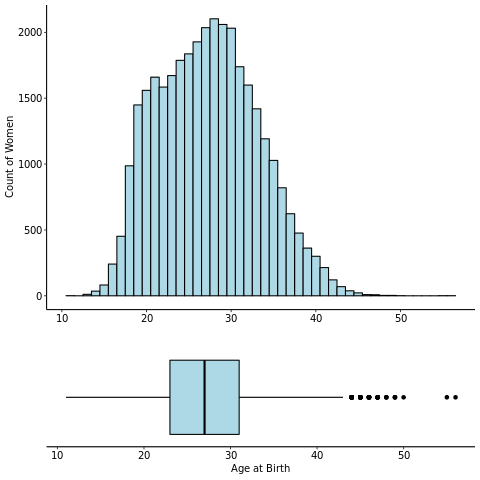

In [12]:
%%R 
bx_hist

# race

In [32]:
race_df=pd.read_csv(RACE_FILE, sep="\t")

In [43]:
keep_race_df = race_df[race_df.GRID.isin(grids_df.GRID)].copy()
keep_race_df.set_index('GRID', inplace=True)

In [44]:
keep_race_df.head(2)
keep_race_df.reset_index(inplace=True)
keep_race_df.GRID.nunique()
keep_race_df.shape

,RACE_LIST_AFRICAN_AMERICAN,RACE_LIST_ASIAN,RACE_LIST_CAUCASIAN,RACE_LIST_HISPANIC,RACE_LIST_NATIVE_AMERICAN,RACE_LIST_OTHER
GRID,,,,,,
R200006865,0,0,1,0,0,0
R200009152,0,0,1,0,0,0


33569

(33569, 7)

In [45]:
# count of each type of race 
keep_race_df.set_index('GRID', inplace=True, drop=True)
count_df = pd.DataFrame(keep_race_df.sum(0)).reset_index()
count_df.columns = ['race','count']

In [48]:
# add type of delivery 
keep_race_df.reset_index(inplace=True)
keep_race_df['label'] = keep_race_df.GRID.map(grid_label_dict)

In [57]:
# count of each type of race 

# preterm
ptb_race_df = keep_race_df.loc[keep_race_df['label']=='preterm'].copy()
ptb_race_df.set_index('GRID', inplace=True, drop=True)
ptb_race_df.drop('label', axis=1, inplace=True)

# preterm race count
ptb_race_df.sum()


# term
term_race_df = keep_race_df.loc[keep_race_df['label']=='term'].copy()
term_race_df.set_index('GRID', inplace=True, drop=True)
term_race_df.drop('label', axis=1, inplace=True)

# preterm race count
term_race_df.sum()


RACE_LIST_AFRICAN_AMERICAN    1485
RACE_LIST_ASIAN                209
RACE_LIST_CAUCASIAN           4835
RACE_LIST_HISPANIC             658
RACE_LIST_NATIVE_AMERICAN       12
RACE_LIST_OTHER                 71
dtype: int64

RACE_LIST_AFRICAN_AMERICAN     4605
RACE_LIST_ASIAN                1392
RACE_LIST_CAUCASIAN           15942
RACE_LIST_HISPANIC             3278
RACE_LIST_NATIVE_AMERICAN        71
RACE_LIST_OTHER                 330
dtype: int64

RACE_LIST_AFRICAN_AMERICAN    1485
RACE_LIST_ASIAN                209
RACE_LIST_CAUCASIAN           4835
RACE_LIST_HISPANIC             658
RACE_LIST_NATIVE_AMERICAN       12
RACE_LIST_OTHER                 71
dtype: int64

In [49]:
keep_race_df.head()

,GRID,RACE_LIST_AFRICAN_AMERICAN,RACE_LIST_ASIAN,RACE_LIST_CAUCASIAN,RACE_LIST_HISPANIC,RACE_LIST_NATIVE_AMERICAN,RACE_LIST_OTHER,label
0,R200006865,0,0,1,0,0,0,term
1,R200009152,0,0,1,0,0,0,postterm
2,R200009182,0,0,1,0,0,0,term
3,R200014259,0,0,1,0,0,0,preterm
4,R200020899,0,0,1,0,0,0,term


In [21]:
rename_races = { 'RACE_LIST_AFRICAN_AMERICAN':'African American',
                 'RACE_LIST_ASIAN':'Asian',
                 'RACE_LIST_CAUCASIAN': "White", 
                 'RACE_LIST_HISPANIC': "Hispanic",
                 'RACE_LIST_NATIVE_AMERICAN':"Native American", 
                 'RACE_LIST_OTHER':"Other"}

In [22]:
count_df['Race'] = count_df.race.map(rename_races)
count_df.drop('race', axis=1, inplace=True)

In [23]:
count_df.sort_values('count')

,count,Race
4,84,Native American
5,409,Other
1,1617,Asian
3,3979,Hispanic
0,6178,African American
2,21343,White


In [24]:
%%R -i count_df


head(count_df)
count_df = count_df %>% arrange(desc(count))
count_df$Race <- as.factor(count_df$Race)

sorted = c('White','African American','Hispanic','Asian','Other','Native American')
count_df$Race <- factor(count_df$Race, levels=sorted)


race_plt = ggplot(data=count_df, aes(x=Race, y=count/1000)) + geom_bar(stat='identity', fill="lightblue") + 
    geom_text(aes(label=count, vjust=-0.25), size=2.0) + theme_pubr(base_family="Arial", base_size=base_font_size) + 
    ylab("Count of Women (Thousands)") + theme(axis.text.x = element_text(angle = -30, hjust = 0),
                                                plot.margin = unit(c(.25, 1, 0, 0.25), "cm"))

race_plt


save.file=file.path(OUTPUT_DIR, sprintf('%s_race_distribtuion.pdf',DATE))
# ggsave(save.file,race_plt,  device = cairo_pdf, height=3, width=3, units="in")

# ega


In [17]:
ega_df = pd.read_csv(DELIVERY_LABELS_FILE, sep="\t")

In [20]:
ega_df.head()

,GRID,consensus_delivery,num_codes,max_diff_days,icd_exists,cpt_exists,ega_exists,icd_label,ega_label,consensus_label,delivery_id
0,R200000594,2006-04-05,2,2,True,True,False,preterm,None,preterm,2006-04-05_R200000594
1,R200006865,2015-12-19,2,2,True,True,False,"preterm, term",None,term,2015-12-19_R200006865
2,R200009152,2007-04-26,2,0,True,True,False,"postterm, term",None,postterm,2007-04-26_R200009152
3,R200009182,2014-07-13,2,0,False,True,True,None,term,term,2014-07-13_R200009182
4,R200009647,2014-01-15,3,3,True,True,True,preterm,preterm,preterm,2014-01-15_R200009647


In [21]:
eega_df=pd.read_csv("/dors/capra_lab/users/abraha1/prelim_studies/crp_gest_age_assoc/data/EGA_w-in_3days_of_delivery.tsv", sep="\t")

In [22]:
# convert to datetime
eega_df.delivery_date = pd.to_datetime(eega_df.delivery_date)
final_labels_df.delivery_date = pd.to_datetime(final_labels_df.delivery_date)

In [23]:
eega_df['label'] = 'None'
eega_df.head()

,DOB,GRID,max_delivery_days_since_dob,num_cpt_codes,range_dates_days,delivery_date,closest_ega,closest_ega_DATE,diff,label
0,1993-07-04,R200009182,7679 days 00:00:00.000000000,2,1,2014-07-13,39.143,2014-07-13,0 days 00:00:00.000000000,None
1,1987-12-03,R200010144,10152 days 00:00:00.000000000,2,1,2015-09-19,38.100,2015-09-19,0 days 00:00:00.000000000,None
2,1986-11-10,R200014259,7655 days 00:00:00.000000000,1,0,2007-10-26,31.000,2007-10-26,0 days 00:00:00.000000000,None
3,1986-03-06,R200020899,10192 days 00:00:00.000000000,1,0,2014-01-30,39.571,2014-01-30,0 days 00:00:00.000000000,None
4,1986-03-06,R200020899,9147 days 00:00:00.000000000,1,0,2011-03-22,40.429,2011-03-22,0 days 00:00:00.000000000,None


In [24]:
# ega overlap with demographic data 
eega_df.shape
eega_df[eega_df.GRID.isin(grids_df.GRID)].shape

(31709, 10)

(28500, 10)

In [25]:
# summary stats
eega_df.closest_ega.mean()
eega_df.closest_ega.median()

38.530783689173425

39.286

In [26]:
# add label 

ega_w_label_df = pd.DataFrame()
for index, row in eega_df.iterrows(): 

    for index, lb_row in final_labels_df.loc[final_labels_df['GRID']==row.GRID].iterrows(): 
        
        if np.absolute((lb_row.delivery_date - row.delivery_date).days) < 3:
            
            temp_df = pd.DataFrame({'GRID':[row.GRID], 'closest_ega':[row.closest_ega],
                                    'delivery_date': [row.delivery_date], 'label': [lb_row.label]})
            ega_w_label_df= ega_w_label_df.append(temp_df)

    

In [27]:
# compare counts 
eega_df.shape
eega_df.GRID.nunique()
print("--")
ega_w_label_df.shape
ega_w_label_df.GRID.nunique()

(31709, 10)

26135

--


(21967, 4)

21967

In [28]:
# covert ega to days
ega_w_label_df['ega_days'] = ega_w_label_df['closest_ega']*7

In [29]:
# plot distriubtion
sns.set(context='talk', style='ticks', rc={'figure.facecolor':'white', 'figure.figsize':(6,6),'xtick.bottom': True}, font_scale=1.2)
plt_df = ega_w_label_df.loc[ega_w_label_df['label'] == 'preterm'].copy()
plt_df.ega_days.describe()
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(plt_df.ega_days, ax =ax, color='red')
plt.axvline(x=230, c='k')
plt.show()

count    3380.000000
mean      230.322659
std        31.281680
min        70.000000
25%       217.000000
50%       241.003000
75%       254.002000
max       259.000000
Name: ega_days, dtype: float64

In [30]:
sns.set(context='talk', style='ticks', rc={'figure.facecolor':'white', 'figure.figsize':(6,6),'xtick.bottom': True}, font_scale=1.2)
plt_df = ega_w_label_df.loc[ega_w_label_df['label'] == 'term'].copy()
plt_df.ega_days.describe()
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(plt_df.ega_days, ax =ax, color='blue')
plt.axvline(x=230, c='k')
plt.show()

count    18125.000000
mean       276.476762
std          8.947339
min        136.997000
25%        271.999000
50%        276.997000
75%        283.003000
max        294.000000
Name: ega_days, dtype: float64

In [31]:
# summary stats for eega_df
eega_df.head()
eega_df.shape
eega_df.GRID.duplicated().sum()

,DOB,GRID,max_delivery_days_since_dob,num_cpt_codes,range_dates_days,delivery_date,closest_ega,closest_ega_DATE,diff,label
0,1993-07-04,R200009182,7679 days 00:00:00.000000000,2,1,2014-07-13,39.143,2014-07-13,0 days 00:00:00.000000000,None
1,1987-12-03,R200010144,10152 days 00:00:00.000000000,2,1,2015-09-19,38.100,2015-09-19,0 days 00:00:00.000000000,None
2,1986-11-10,R200014259,7655 days 00:00:00.000000000,1,0,2007-10-26,31.000,2007-10-26,0 days 00:00:00.000000000,None
3,1986-03-06,R200020899,10192 days 00:00:00.000000000,1,0,2014-01-30,39.571,2014-01-30,0 days 00:00:00.000000000,None
4,1986-03-06,R200020899,9147 days 00:00:00.000000000,1,0,2011-03-22,40.429,2011-03-22,0 days 00:00:00.000000000,None


(31709, 10)

5574

In [36]:
eega_df.GRID.nunique()
eega_df.closest_ega.describe()

26135

count    31709.000000
mean        38.530784
std          3.131680
min         10.000000
25%         38.143000
50%         39.286000
75%         40.286000
max         46.000000
Name: closest_ega, dtype: float64

In [35]:
np.sum(eega_df.closest_ega < 20)
np.sum(eega_df.closest_ega < 20)/eega_df.shape[0]

63

0.001986817622756946

In [31]:
%%R -i eega_df

# plot ega

base_font_size=10

eega_df2 <-
  eega_df %>%
  mutate(outlier = (closest_ega > median(closest_ega) + IQR(closest_ega) * 1.5) | (closest_ega < median(closest_ega) - IQR(closest_ega) * 1.5) ) 



bxplt <- eega_df %>%
  ggplot(aes(x="", y = closest_ega)) + 
  geom_boxplot(fill = "lightblue", color = "black", outlier.size = 0.5, outlier.alpha = 0.5) +              
  coord_flip() +
  theme_pubr(base_family="Arial", base_size=12) +
  xlab("") + ylab("Estimated Gest. Age") + 
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y=element_blank())  

hist <- eega_df %>% select(closest_ega) %>%
  ggplot() +
  geom_histogram(aes(x = closest_ega, y = (..count..)),
                 position = "identity", binwidth = 1, 
                 fill = "lightblue", color = "black") +
                 geom_vline(xintercept = 38.5, color = "darkred", size=0.8) + 
                 ylab("Count of Women") + xlab("") + theme_pubr(base_family="Arial", base_size=base_font_size) + 
                 scale_x_continuous(breaks=c( seq(0,45, 3))) + theme(axis.text.x = element_text(size=8))



# combine figures 
bx_hist = plot_grid(hist, bxplt, 
                   ncol = 1, rel_heights = c(2.5, 1),
                   align = 'v', axis = 'lr') 


bx_hist
save.file=file.path(OUTPUT_DIR, sprintf('%s_ega_distribtuion.pdf',DATE))
# ggsave(save.file,bx_hist,  device = cairo_pdf, height=3.5, width=3.5, units="in")


# save figures seperately
# save.hist=file.path(OUTPUT_DIR, sprintf('%s_age_hist.pdf',DATE))
# save.bxplt=file.path(OUTPUT_DIR, sprintf('%s_age_bxplt.pdf',DATE))

# ggsave(save.hist, hist,  device = cairo_pdf, height=2, width=2, units="in")
# ggsave(save.bxplt,bxplt,  device = cairo_pdf, height=1, width=2, units="in")

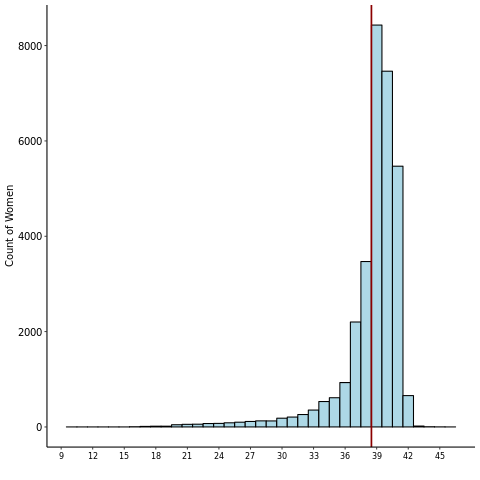

In [33]:
%%R 
hist

In [ ]:
# REPEAT PLOT BUT REMOVE DUPLICATED INDIVIDUAL 



In [43]:
sorted_temp = eega_df.sort_values(['GRID','delivery_date'])

eega_df_no_dups = sorted_temp[~sorted_temp.duplicated(subset='GRID', keep='first')]

In [50]:
%%R -i eega_df_no_dups

# plot ega

eega_df=eega_df_no_dups

base_font_size=10

eega_df2 <-
  eega_df %>%
  mutate(outlier = (closest_ega > median(closest_ega) + IQR(closest_ega) * 1.5) | (closest_ega < median(closest_ega) - IQR(closest_ega) * 1.5) ) 



bxplt <- eega_df %>%
  ggplot(aes(x="", y = closest_ega)) + 
  geom_boxplot(fill = "lightblue", color = "black", outlier.size = 0.5, outlier.alpha = 0.5) +              
  coord_flip() +
  theme_pubr(base_family="Arial", base_size=12) +
  xlab("") + ylab("Estimated Gest. Age") + 
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y=element_blank())  

hist <- eega_df %>% select(closest_ega) %>%
  ggplot() +
  geom_histogram(aes(x = closest_ega, y = (..count..)),
                 position = "identity", binwidth = 1, 
                 fill = "lightblue", color = "black") +
                 geom_vline(xintercept = 38.5, color = "darkred", size=0.8) + 
                 ylab("Count of Women") + xlab("") + theme_pubr(base_family="Arial", base_size=base_font_size) + 
                 scale_x_continuous(breaks=c( seq(0,45, 3))) + theme(axis.text.x = element_text(size=8))



# combine figures 
bx_hist = plot_grid(hist, bxplt, 
                   ncol = 1, rel_heights = c(2.5, 1),
                   align = 'v', axis = 'lr') 


# bx_hist
# save.file=file.path(OUTPUT_DIR, sprintf('%s_ega_distribtuion_no_dups_w_in_3days.pdf',DATE))
# ggsave(save.file,bx_hist,  device = cairo_pdf, height=3.5, width=3.5, units="in")


# save figures seperately
save.hist=file.path(OUTPUT_DIR, sprintf('%s_age_hist_no_dups_w_in_3days.pdf',DATE))
save.bxplt=file.path(OUTPUT_DIR, sprintf('%s_age_bxplt_no_dups_w_in_3days.pdf',DATE))

# ggsave(save.hist, hist,  device = cairo_pdf, height=2, width=2, units="in")
# ggsave(save.bxplt,bxplt,  device = cairo_pdf, height=1, width=2, units="in")

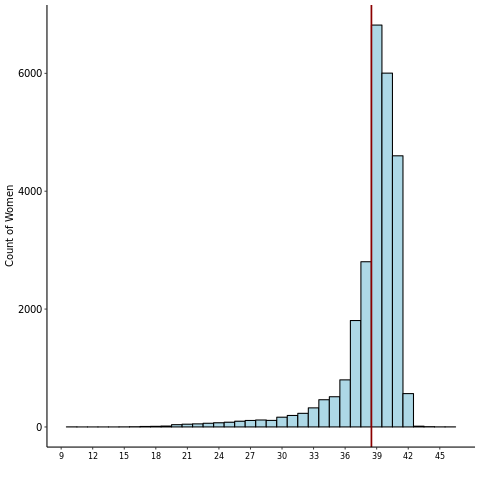

In [48]:
%%R 
hist

In [53]:
eega_df_no_dups.closest_ega.describe()
np.median(eega_df_no_dups.closest_ega)

count    26135.000000
mean        38.466291
std          3.235134
min         10.000000
25%         38.000000
50%         39.286000
75%         40.286000
max         46.000000
Name: closest_ega, dtype: float64

39.286

In [52]:
np.sum(eega_df_no_dups.closest_ega < 20)
np.sum(eega_df_no_dups.closest_ega < 20)/eega_df.shape[0]

49

0.0015453025954776246